NAME: Sondos Mohamed


Task3 in Oasis Infobyte intership

In this exciting machine learning project, I will guide you through the intricate process of training a car price prediction model. Delving into essential factors such as brand reputation, car features, horsepower, and mileage, we'll explore the dynamic world of predicting car prices. This engaging project aligns with Task 3 of the Oasis Infobyte internship, offering a hands-on opportunity to master the art of machine learning in the realm of car price prediction. Let's embark on this journey together!

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/car data.csv')
print(df.head(5))

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [3]:
df.describe

<bound method NDFrame.describe of     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  

In [4]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [6]:
# Preprocessing
df = df.drop(['Car_Name', 'Selling_type'], axis=1)  # Remove irrelevant columns
df_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission'])  # Convert categorical variables

In [7]:
# Split features and target variable
X = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']

<ipython-input-8-2535a2ec4cfd>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_encoded['Selling_Price'])


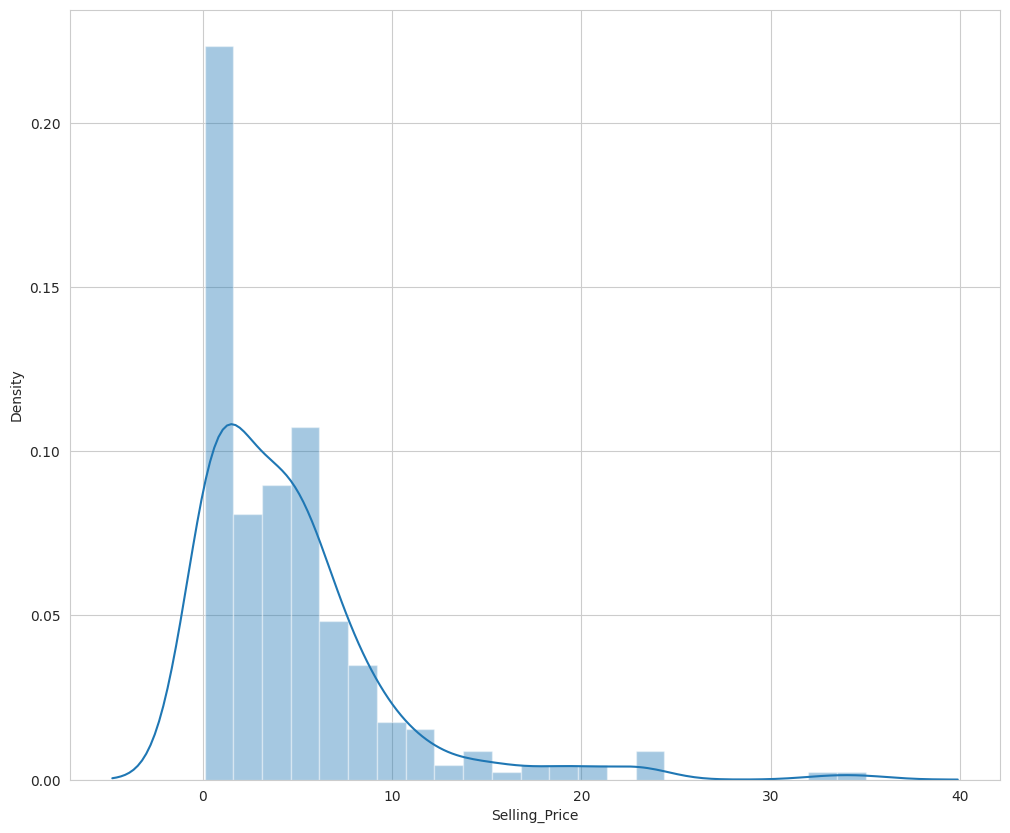

In [8]:
# Create a plot using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(12, 10))
sns.distplot(df_encoded['Selling_Price'])
plt.show()

Check the correlation among all the features of this dataset

In [9]:
df.corr()

<ipython-input-9-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


<ipython-input-10-3793b13bdf3e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


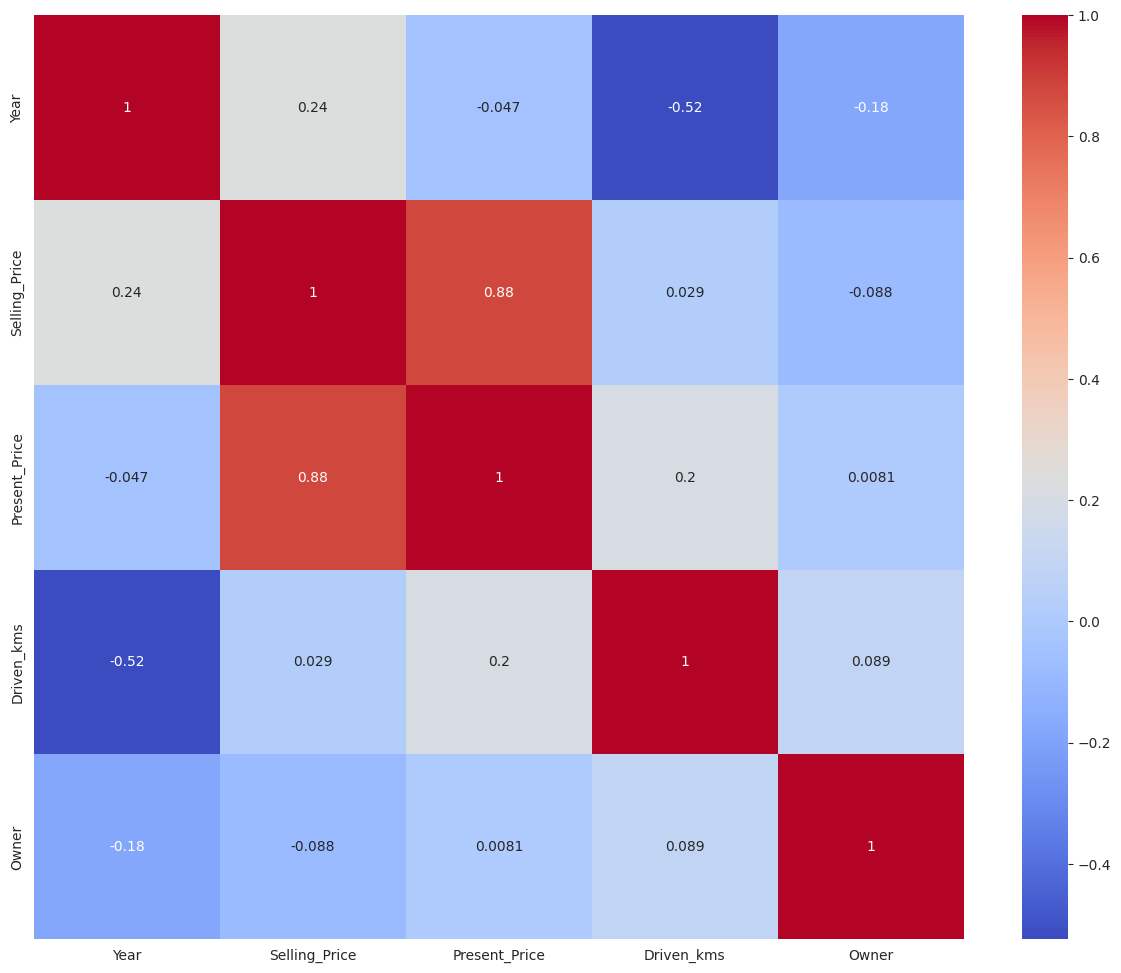

In [10]:
plt.figure(figsize=(15,12))
correlations = df.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Data Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MODEL 1: Linear Regression

In [13]:
# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [14]:
# Evaluate the models
linear_pred = linear_model.predict(X_test_scaled)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)
print('Linear Regression Mean Squared Error:', linear_mse)
print('Linear Regression R-squared:', linear_r2)

Linear Regression Mean Squared Error: 3.577833375739793
Linear Regression R-squared: 0.8446823273536489


MODEL 2: Random Forest Regression

In [15]:
# Train a Random Forest Regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [16]:
rf_pred = rf_model.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print('Random Forest Regression Mean Squared Error:', rf_mse)
print('Random Forest Regression R-squared:', rf_r2)

Random Forest Regression Mean Squared Error: 0.8950367359016402
Random Forest Regression R-squared: 0.9611454732084931


MODEL 3:  Support Vector Regression

In [17]:
# Train a Support Vector Regression model
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

SVR()

In [18]:
svr_pred = svr_model.predict(X_test_scaled)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)
print('Support Vector Regression Mean Squared Error:', svr_mse)
print('Support Vector Regression R-squared:', svr_r2)

Support Vector Regression Mean Squared Error: 5.440805924827156
Support Vector Regression R-squared: 0.7638086448366537


MODEL 4: Gradient Boosting Regression

In [19]:
# Train a Gradient Boosting Regression model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

In [20]:
gb_pred = gb_model.predict(X_test_scaled)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)
print('Gradient Boosting Regression Mean Squared Error:', gb_mse)
print('Gradient Boosting Regression R-squared:', gb_r2)

Gradient Boosting Regression Mean Squared Error: 0.8707620187571663
Gradient Boosting Regression R-squared: 0.9621992653153568


MODEL 5: Decision Tree Regression

In [21]:
# Train a Decision Tree Regression model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [22]:
dt_pred = dt_model.predict(X_test_scaled)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
print('Decision Tree Regression Mean Squared Error:', dt_mse)
print('Decision Tree Regression R-squared:', dt_r2)

Decision Tree Regression Mean Squared Error: 2.047288524590164
Decision Tree Regression R-squared: 0.9111249587442911


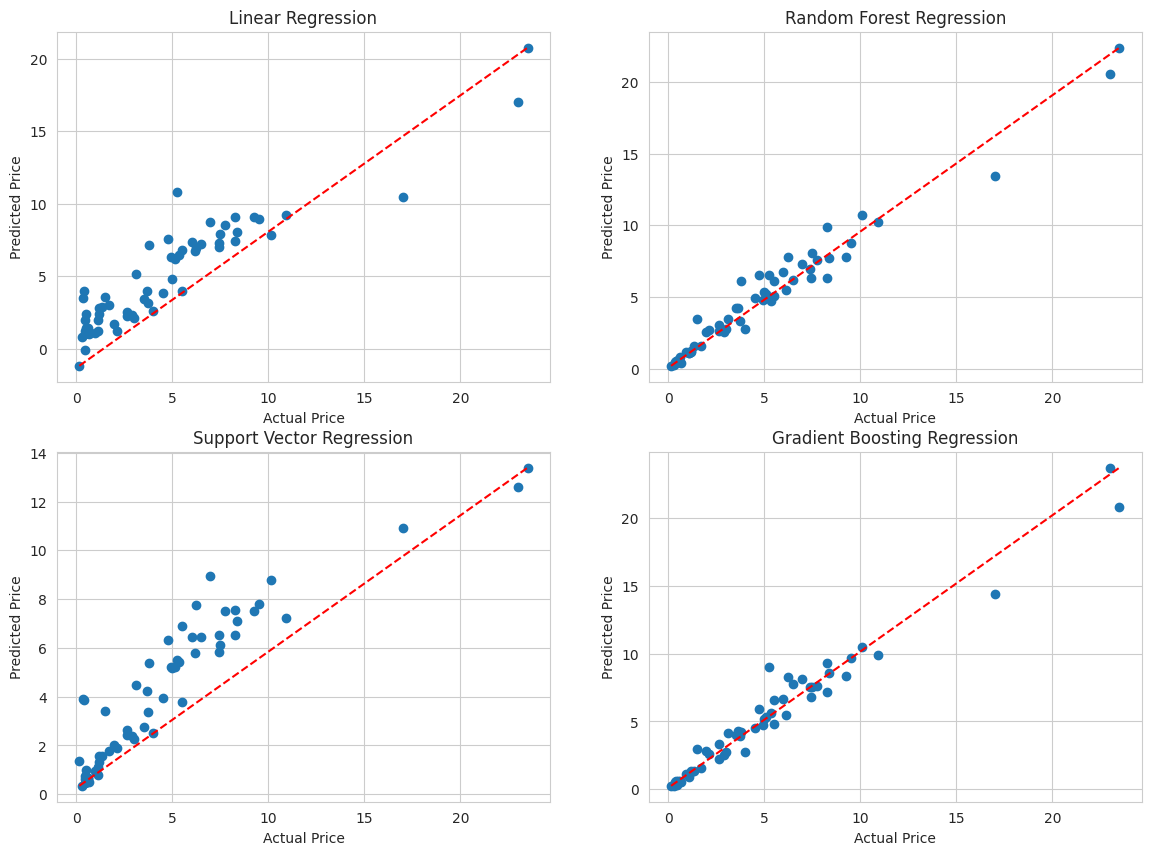

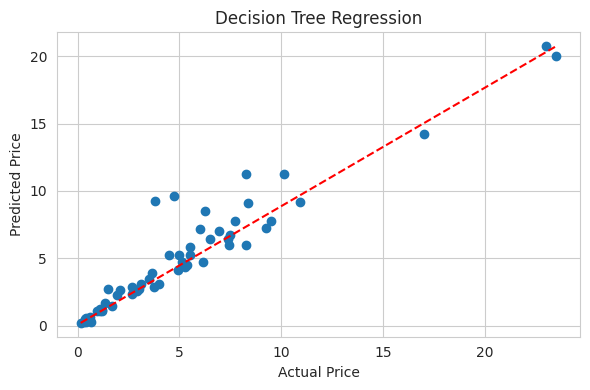

In [23]:
import matplotlib.pyplot as plt

# Visualize Predictions
plt.figure(figsize=(14, 10))

# Linear Regression
plt.subplot(221)
plt.scatter(y_test, linear_pred)
plt.plot([min(y_test), max(y_test)], [min(linear_pred), max(linear_pred)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression')

# Random Forest Regression
plt.subplot(222)
plt.scatter(y_test, rf_pred)
plt.plot([min(y_test), max(y_test)], [min(rf_pred), max(rf_pred)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest Regression')

# Support Vector Regression
plt.subplot(223)
plt.scatter(y_test, svr_pred)
plt.plot([min(y_test), max(y_test)], [min(svr_pred), max(svr_pred)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Support Vector Regression')

# Gradient Boosting Regression
plt.subplot(224)
plt.scatter(y_test, gb_pred)
plt.plot([min(y_test), max(y_test)], [min(gb_pred), max(gb_pred)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Gradient Boosting Regression')

# Decision Tree Regression
plt.figure(figsize=(6, 4))
plt.scatter(y_test, dt_pred)
plt.plot([min(y_test), max(y_test)], [min(dt_pred), max(dt_pred)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Decision Tree Regression')

plt.tight_layout()
plt.show()

In [24]:
# Test Scores
test_scores = {
    'Linear Regression': linear_r2,
    'Random Forest Regression': rf_r2,
    'Support Vector Regression': svr_r2,
    'Gradient Boosting Regression': gb_r2,
    'Decision Tree Regression': dt_r2
}

print('Test Scores:')
for model, score in test_scores.items():
    print(f'{model}: {score}')

Test Scores:
Linear Regression: 0.8446823273536489
Random Forest Regression: 0.9611454732084931
Support Vector Regression: 0.7638086448366537
Gradient Boosting Regression: 0.9621992653153568
Decision Tree Regression: 0.9111249587442911



Based on the test scores and visualizations, the Gradient Boosting and Decision Tree Regression models demonstrated the highest performance.